In [1]:
@import

import sys
sys.path.append("/Users/fabrizioniro/Library/CloudStorage/GoogleDrive-fabrizion18@gmail.com/My Drive/Tesi/faultdiag-thesis/tesi-python/python_mcmcdagtargets")


############################################
##      Requires: NumPy, SciPy, tqdm      ##
############################################
from mcmcdagtargets import MCMCDagTargets

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

data = pd.read_csv("/Users/fabrizioniro/Library/CloudStorage/GoogleDrive-fabrizion18@gmail.com/My Drive/Tesi/faultdiag-thesis/tesi-python/data/data_processed.csv")


In [2]:
data

,TOV_POS,TT103,TT105,TT112,TT124,TT126,GEN_TEN,CPT104,DPT113,XT101,TT129,TT130,FCV134,TOVSPOS,XT100,PT212,Fault
0,1.765200,-0.820087,0.965965,0.773948,1.337211,-1.128067,-0.814951,0.883274,0.368360,0.531226,-1.422122,-0.058423,0.186426,-3.608624,1.342956,-0.025783,0
1,1.765200,-0.924606,0.671964,0.731663,1.034742,-1.116213,-0.051364,0.845848,0.279074,0.821848,-1.347566,-0.090250,0.186426,-3.680447,1.249340,-0.061000,0
2,1.925981,-0.404904,0.550904,0.533631,0.279106,-1.101581,-0.034452,0.368861,0.441199,-0.340642,-1.245898,-0.334857,0.186426,-3.698403,1.062110,-0.075653,0
3,1.675162,-0.548918,0.397952,0.606220,0.666726,-1.040273,0.695733,0.660309,0.517092,0.821848,-1.421856,-0.229914,0.186426,-3.670571,1.331254,-0.100589,0
4,1.874531,-0.718459,0.341801,0.750339,0.659528,-1.247719,0.620051,0.810014,0.398905,1.693716,-1.336003,-0.161800,0.186426,-3.637353,1.459975,-0.072172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,-0.029118,-0.150593,-0.114586,0.049475,-0.071911,-0.284206,0.051377,0.196063,-0.113317,-0.050019,-0.026681,-0.291578,0.186426,0.269818,-0.061273,-0.088445,1
1588,-0.029118,-0.150593,-0.114586,0.049475,-0.071911,-0.284206,0.051377,0.196063,-0.113317,-0.050019,-0.026681,-0.291578,0.186426,0.269818,-0.061273,-0.088445,1
1589,-0.029118,-0.150593,-0.114586,0.049475,-0.071911,-0.284206,0.051377,0.196063,-0.113317,-0.050019,-0.026681,-0.291578,0.186426,0.269818,-0.061273,-0.088445,1
1590,-0.029118,-0.150593,-0.114586,0.049475,-0.071911,-0.284206,0.051377,0.196063,-0.113317,-0.050019,-0.026681,-0.291578,0.186426,0.269818,-0.061273,-0.088445,1


In [3]:
mcmc = MCMCDagTargets(seed = None)

K     = 2
n_all = [data[data["Fault"] == 0].shape[0], data[data["Fault"] == 1].shape[0]]
X = data.drop(columns=["Fault"])
X = np.matrix(X)
q = X.shape[1]

## Fix hyperparameters of Beta(a_k,b_k) prior on the probabilities of intervention and prior probability of edge inclusion w
a_k = 1/q
b_k = 1
w   = 0.1

## Fix number of MCMC iterations and burn-in
S    = 200000
burn = 40000

# Run MCMC algorithm
out = mcmc.mcmc_dag_targets(
    X = X, 
    S = S, 
    burn = burn,
    w = w, a = None, a_k = a_k, b_k = b_k, n_all = n_all)

Targets_estimate = out['Targets_estimate']
P_DAG_estimate = out['P_DAG_estimate']
DAG_estimate = out['DAG_estimate']
Trace_DAG_edges = out['Trace_DAG_edges']

MCMC Sampling:   0%|          | 0/200000 [00:00<?, ?it/s]

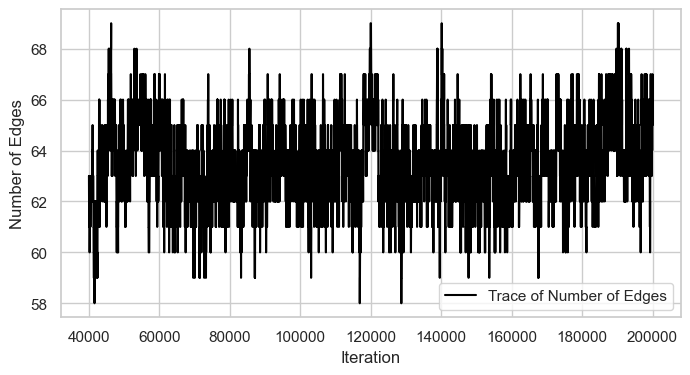

In [26]:
plt.figure(figsize=(8, 4))

# Set Seaborn style and color palette
sns.set(style="whitegrid")

# Plot the trace using Seaborn
sns.lineplot(x=range(burn, S), y=Trace_DAG_edges[burn:S], label='Trace of Number of Edges', color="Black")
#plt.title('Trace Plot for Convergence Diagnostics - Number of Edges', y=1.05)
plt.xlabel('Iteration')
plt.ylabel('Number of Edges')
plt.legend()

plt.savefig('output/orc/post_trace.png', bbox_inches='tight')
plt.show()

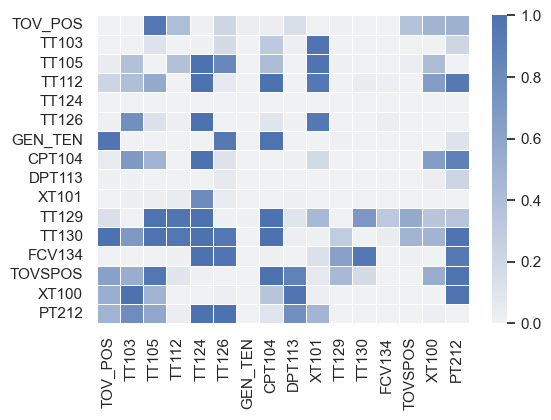

In [27]:
plt.figure(figsize=(6, 4))
palette = sns.color_palette("light:b", as_cmap=True)

sns.set_theme(style="white")
#palette = sns.color_palette("rocket_r", as_cmap=True)
DAG_hm = sns.heatmap(P_DAG_estimate, linewidths=.5, cmap=palette)

DAG_hm.set_xticklabels(data.columns.drop('Fault'), rotation=90)
DAG_hm.set_yticklabels(data.columns.drop('Fault'), rotation=0)

#plt.title('Posterior probabilities of edge inclusion', y=1.05)

plt.savefig('output/orc/post_p_edge_inc.png', bbox_inches='tight')
plt.show()

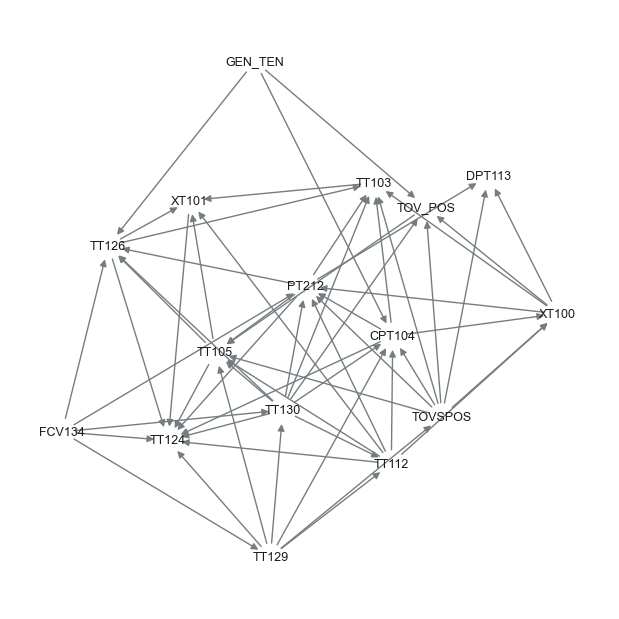

In [24]:
plt.figure(figsize=(6, 6))

# Example arrays of keys and values
keys = [i for i in range(len(data.columns.drop('Fault')))]
values = data.columns.drop('Fault')
# Initialize an empty dictionary
labels = {}
# Create the dictionary by iterating through the arrays
for i in range(len(keys)):
    labels[keys[i]] = values[i]
    


G = nx.DiGraph(DAG_estimate)
pos = nx.kamada_kawai_layout(G)  # Layout algorithm (you can choose other layouts)
nx.draw(G, pos, with_labels=True, labels=labels, node_size=400, node_color='none', edge_color='#767D80', font_size=9, arrows=True)

plt.savefig('output/orc/post_graph.png', bbox_inches='tight')
plt.show()

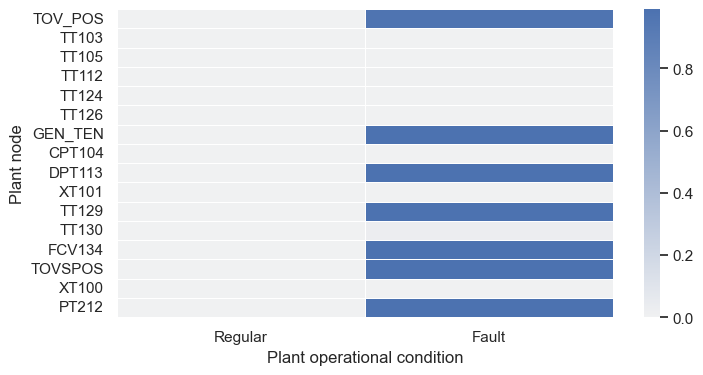

In [28]:
plt.figure(figsize=(8, 4))
palette = sns.color_palette("light:b", as_cmap=True)

rows = data.columns.drop('Fault')
df_int_est = pd.DataFrame(Targets_estimate, index=rows, columns=['Regular', 'Fault'])

Targets_hm = sns.heatmap(df_int_est, linewidths=.5, cmap=palette)
#plt.title('Posterior probabilities of intervention targets', y=1.05)
plt.ylabel('Plant node')
plt.xlabel('Plant operational condition')

plt.savefig('output/orc/post_int_targets.png', bbox_inches='tight')
plt.show()